In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib as plt

from typing import List

In [7]:
# Cargamos el dataset de viento
datos = pd.read_excel('wind_data.xlsx')

# Visualizamos el dataset
datos.head()

,dia,regional wind,wind gap norte sur
0,1,8.000000,0.000000
1,2,8.346296,0.181523
2,3,10.062316,0.188643
3,4,10.791337,0.071085
4,5,10.754093,0.078442


### Regresion Lineal

Vamos a estimar los parámetros \(\kappa\) y \(\sigma\) para el modelo de velocidad del viento utilizando regresiones lineales. La ecuación original es:

\[ S_{i+1} = S_i + \kappa (\theta(t_i) - S_i) \Delta + \sigma \sqrt{\Delta} Z_i \]

Despejamos \( S_i \) y distribuimos los términos para obtener una forma adecuada para la regresión lineal:

\[ S_{i+1} - S_i = \kappa \theta(t_i) \Delta - \kappa S_i \Delta + \sigma \sqrt{\Delta} Z_i \]

Reescribimos la ecuación en términos de \(\beta\):

\[ \Delta S_i = \beta_0 + \beta_1 \theta(t_i) \Delta + \beta_2 S_i \Delta + \epsilon_i \]

donde:
- \(\Delta S_i = S_{i+1} - S_i\)
- \(\beta_0\) es la constante
- \(\beta_1 = \kappa\)
- \(\beta_2 = -\kappa\)
- \(\epsilon_i = \sigma \sqrt{\Delta} Z_i\)

In [ ]:
# S_i+1 - S_i = kappa*delta*(theta*S_i) + sigma*raiz(delta)*Z

# Y = B1x + error

In [22]:
def theta_function(i):
    return 6 + 2 * np.cos(2 * np.pi * i / 365)

def calcular_error(Y, predicciones):

    n = len(Y)

    residuos = Y - predicciones
    varianza = np.sum(residuos**2) / n

    return np.sqrt(varianza)



In [8]:
datos['Y'] = datos['regional wind'].diff()  # Calcula la diferencia entre días consecutivos

# Preparar X, que es theta_i - S_i 
datos['X'] = theta_function(datos["dia"]) - datos['regional wind'].shift(1)

# Eliminar los valores nulos generados por diff() y shift()
datos = datos.dropna(subset=['Y', 'X'])

datos.head()

,dia,regional wind,wind gap norte sur,Y,X
1,2,8.346296,0.181523,0.346296,-0.001185
2,3,10.062316,0.188643,1.716019,-0.348963
3,4,10.791337,0.071085,0.729021,-2.067055
4,5,10.754093,0.078442,-0.037244,-2.798740
5,6,10.771457,0.642188,0.017364,-2.764751


### Ejercicio 1

In [24]:
X = datos[['X']]  # La variable independiente es X = theta(t_i) - S_i
Y = datos['Y']    # La variable dependiente es Y = S_{i+1} - S_i

model = LinearRegression()
model.fit(X, Y)

B0 = model.intercept_
B1 = model.coef_[0]

print(f"B0: {B0}")
print(f"B1: {B1}")

delta = 1/365
kappa_estimado = B1 / delta

# AHORA ESTIMAMOS SIGMA

predicciones = model.predict(X)

error = calcular_error(Y,predicciones)

sigma_estimado = error / np.sqrt(delta)

print(f"kappa: {kappa_estimado}")
print(f"sigma: {sigma_estimado}")

B0: -0.011480730515035573
B1: 0.2980531528416791
kappa: 108.78940078721287
sigma: 16.040115917375903


In [16]:
# D_i+1 - D_i = -beta*delta*D_i + gamma*raiz(delta)*W_i

# H = B1x + error

# Preparar H, que es D_{i+1} - D_i
datos['H'] = datos['wind gap norte sur'].diff()

# Eliminar los valores nulos generados por diff()
datos = datos.dropna(subset = ('H'))

datos.head()

,dia,regional wind,wind gap norte sur,Y,X,H
3,4,10.791337,0.071085,0.729021,-2.067055,-0.117558
4,5,10.754093,0.078442,-0.037244,-2.798740,0.007358
5,6,10.771457,0.642188,0.017364,-2.764751,0.563745
6,7,9.527320,0.018175,-1.244136,-2.785959,-0.624012
7,8,9.520171,-0.652479,-0.007149,-1.546255,-0.670654


B0: -0.011480730515035573
B1: 0.2980531528416791
kappa: -108.78940078721287


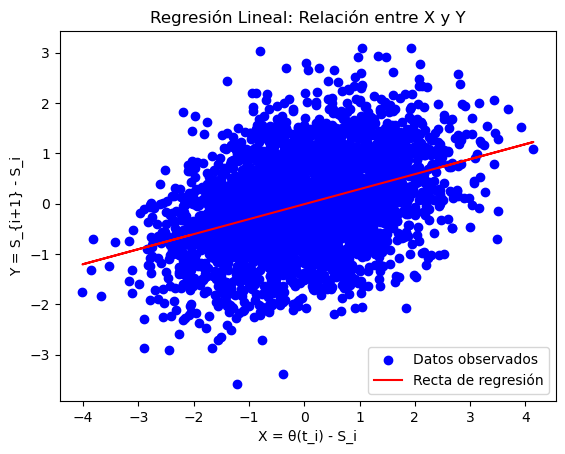

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Suponiendo que ya tienes los datos cargados en un DataFrame llamado 'datos'
# con las columnas 'X' y 'Y'.

X = datos[['X']]  # Variable independiente: θ(t_i) - S_i
Y = datos['Y']    # Variable dependiente: S_{i+1} - S_i

# Ajustar el modelo de regresión lineal
model = LinearRegression()
model.fit(X, Y)

# Obtener los parámetros de la regresión
B0 = model.intercept_
B1 = model.coef_[0]

print(f"B0: {B0}")
print(f"B1: {B1}")

# Estimar kappa
delta = 1/365
kappa_estimado = -B1 / delta
print(f"kappa: {kappa_estimado}")

# Graficar los datos y la recta de regresión
plt.scatter(X, Y, color='blue', label='Datos observados')
plt.plot(X, B0 + B1 * X, color='red', label='Recta de regresión')
plt.xlabel('X = θ(t_i) - S_i')
plt.ylabel('Y = S_{i+1} - S_i')
plt.title('Regresión Lineal: Relación entre X y Y')
plt.legend()
plt.show()


In [42]:
G = datos[['wind gap norte sur']] # La variable independiente es X = D_i
H = datos['H'] # La variable dependiente es Y = D_{i+1} - D_i

regresion_2 = LinearRegression()
regresion_2.fit(G,H)

B0_2 = regresion_2.intercept_
B1_2 = regresion_2.coef_[0]

print(f"B0: {B0_2}")
print(f"B1: {B1_2}")

beta_estimado = B1_2 / delta

# AHORA ESTIMAMOS GAMMA

predicciones_gap = regresion_2.predict(G)

error_gap = calcular_error(H,predicciones_gap)

gamma_estimado = error_gap / np.sqrt(delta)

print(f"beta: {beta_estimado}")
print(f"gamma: {gamma_estimado}")

B0: -0.0040535310183014255
B1: 0.13254519724014166
beta: 48.37899699265171
gamma: 10.093298305351071


### Ejercicio 2

In [40]:
def generar_viento_regional(kappa, sigma, delta, T):
    camino = np.zeros(T)
    camino[0] = theta_function(0) #Valor inicial

    for i in range(1, T):
        Z = np.random.normal(0, 1)
        camino[i] = camino[i-1] + kappa * (theta_function(i) - camino[i-1]) * delta + sigma * np.sqrt(delta) * Z

    return camino

def generar_gap_norte_sur(beta, gamma, delta, T):
    camino = np.zeros(T)
    camino[0] = 0 #Valor inicial

    for i in range(1, T):
        W = np.random.normal(0, 1)
        camino[i] = camino[i-1] - beta * delta * camino[i-1] + gamma * np.sqrt(delta) * W

    return camino


In [51]:
import matplotlib.pyplot as plt

#Generamos 2 caminos con T = 365 uno para cada molino
T = 365

simular_viento = generar_viento_regional(kappa_estimado,sigma_estimado,delta,T)

simular_gap = generar_gap_norte_sur(beta_estimado,gamma_estimado,delta,T)

simulacion_norte = simular_viento + simular_gap/2

simulacion_sur = simular_viento - simular_gap/2


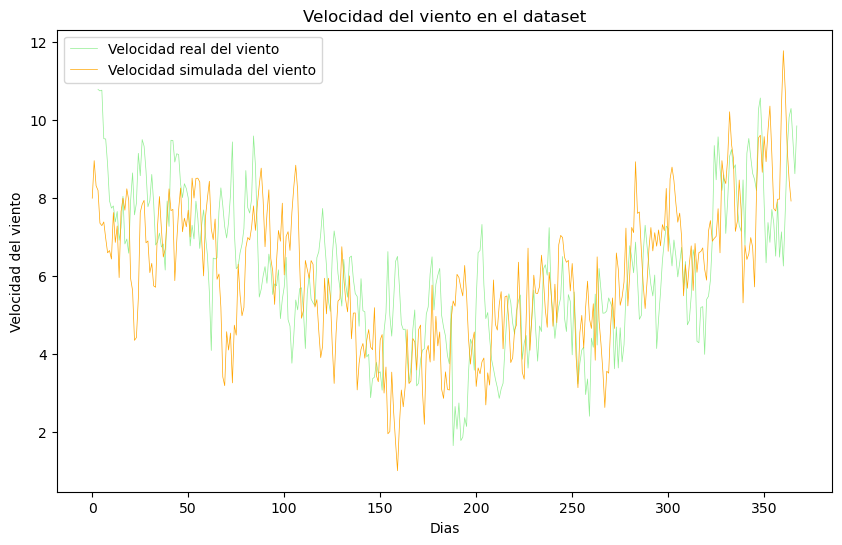

In [52]:
import matplotlib.pyplot as plt

# Graficar la velocidad del viento
plt.figure(figsize=(10, 6))
plt.plot(datos['regional wind'][:T], color='lightgreen', label='Velocidad real del viento', linewidth=0.5)
plt.plot(simular_viento, color='orange', label='Velocidad simulada del viento', linewidth=0.5)

# Añadir etiquetas y título
plt.xlabel('Dias')
plt.ylabel('Velocidad del viento')
plt.title('Velocidad del viento en el dataset')

# Añadir leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

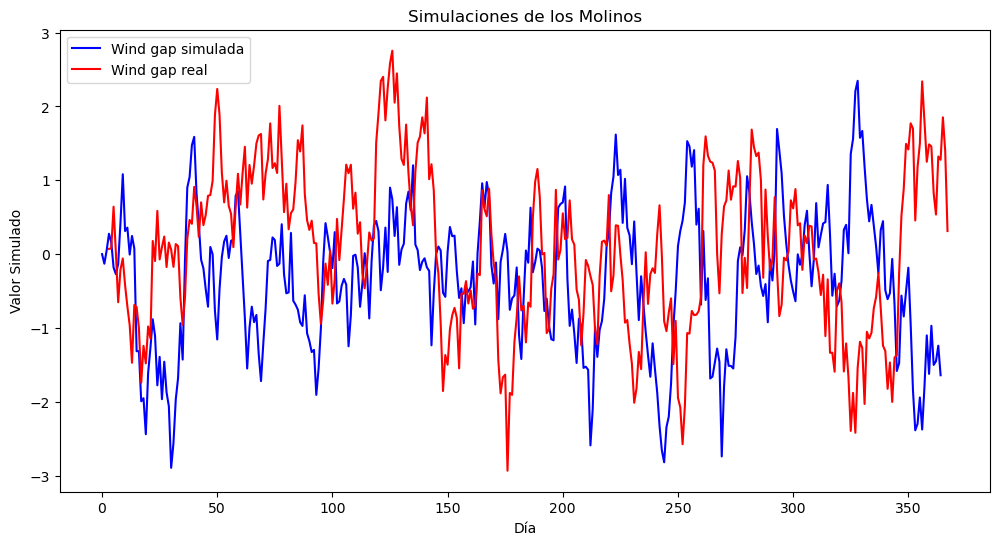

In [53]:
# Graficar las simulaciones
plt.figure(figsize=(12, 6))
plt.plot(simular_gap, color='blue', label='Wind gap simulada')
plt.plot(datos["wind gap norte sur"][:T], color='red', label='Wind gap real')

plt.xlabel('Día')
plt.ylabel('Valor Simulado')
plt.title('Simulaciones de los Molinos')
plt.legend()
plt.show()
